In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from utils.data_prep_utils import DATES
from utils.train_utils import prep_data_train_val_test, show_sample

In [3]:
labels = ['zeev', 'or', 'ron', 'aviya', 'felix']

In [67]:
x_train, x_valid, x_test, y_train, y_valid, y_test = prep_data_train_val_test(DATES, labels,
                                                                              frames_size=32, is_dim_3d=False)

100%|██████████| 3000/3000 [00:00<00:00, 4696.25it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 30000/30000 [00:06<00:00, 4669.97it/s]
0it [00:00, ?it/s]
100%|██████████| 22000/22000 [00:04<00:00, 4551.73it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 21000/21000 [00:04<00:00, 4389.40it/s]


In [61]:
# best_loaded = tf.keras.models.load_model('../models/[64, 5, 2, 0.4, 256, 0.4, 128, 0.4]_2019525_11_21.h5')
# test_predictions = best_loaded.predict(x_test)

In [68]:
best_loaded = tf.keras.models.load_model('../models/5_lbls_relu_[32, 300, 100, 0.2]_2019518_2_11.h5')
test_predictions = best_loaded.predict(x_test)

In [69]:
acc = 0
total = 0
predicted_dict = {}

for lbl in labels:
    predicted_dict[lbl] = []

for i, lbl in enumerate(y_test):
#     if lbl != 1:
        total += 1
        predicted_dict[labels[lbl]].append(test_predictions[i])
        if np.argmax(test_predictions[i]) == lbl:
            acc += 1
#     else:
#         print(lbl)
print('acc: ', (acc/total*100))

acc:  92.22535211267605


### plotting

In [70]:
test_predictions.shape

(14200, 5)

In [98]:
def plot_graph(test_predictions, labels, title):
    # rows = num_of_pics; cols = array_of_preds(labels)
    data = test_predictions

    x = np.arange(data.shape[0])
    dx = (np.arange(data.shape[1])-data.shape[1]/2.)/(data.shape[1]+2.)
    d = 1./(data.shape[1]+2.)

    fig, ax=plt.subplots()
    for i in range(data.shape[1]):
        ax.bar(x,data[:,i], width=d, label="label {}".format(labels[i]))

    plt.xticks(np.arange(data.shape[0]),[i for i in range(test_predictions.shape[0])])
    plt.title("{0}'s Graph".format(lbl))
    plt.xlabel("number of pictures")
    plt.ylabel("output of prediction")
    plt.legend(framealpha=1).draggable()
    plt.gcf().set_size_inches(15, 5, forward=True)
    plt.show()

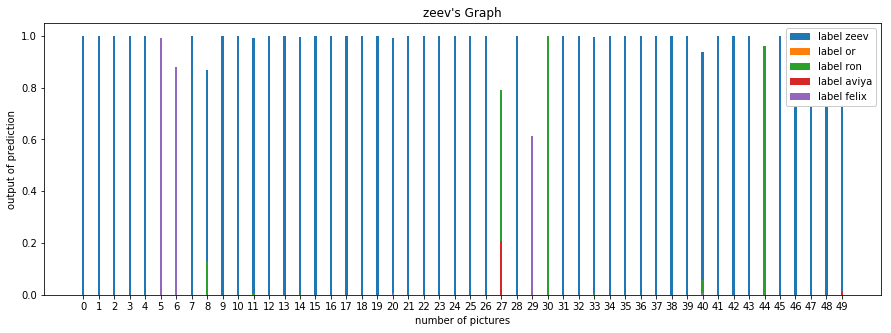

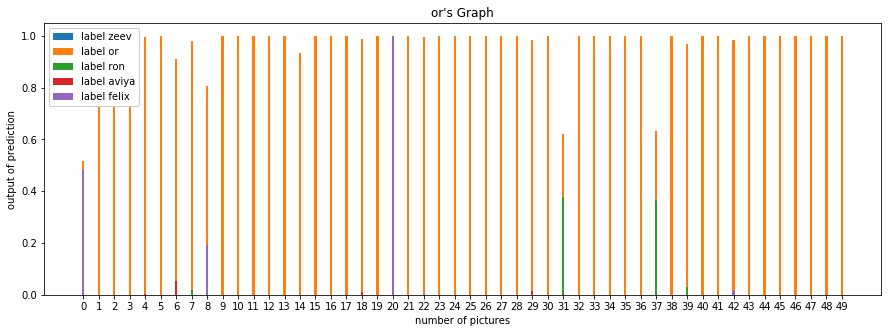

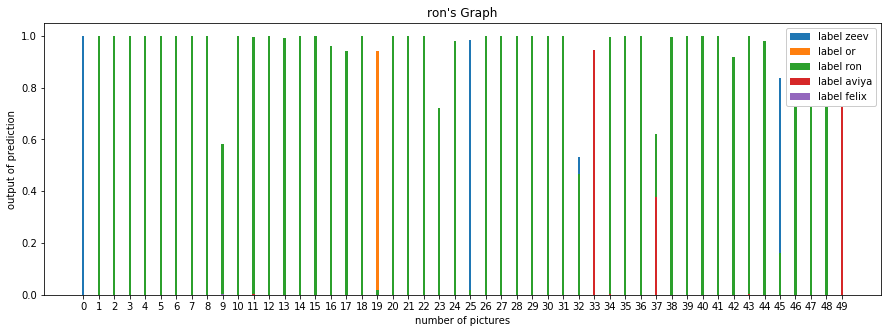

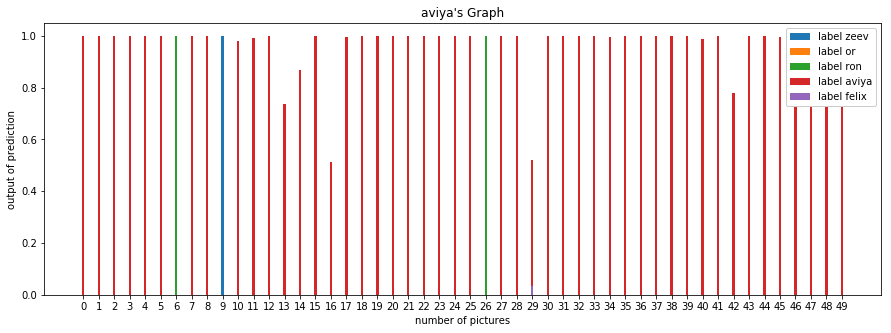

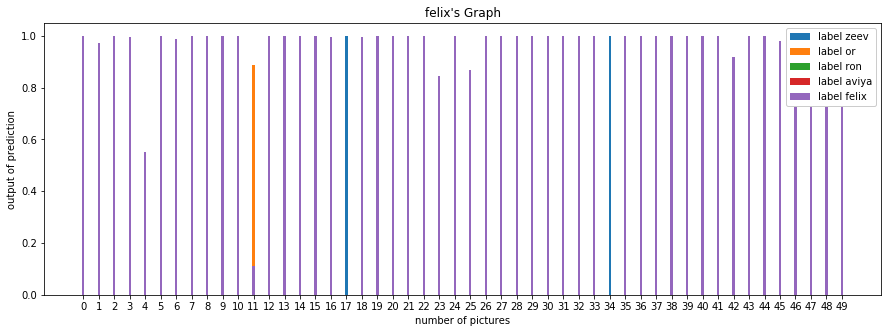

In [99]:
for lbl, val in predicted_dict.items():
    np.random.shuffle(val)
    plot_graph(np.array(val[:50]), labels, lbl)